# 1 Accessing Text Corpora


The following cells will show how to get a corpust from nltk and apply simple statistics to it

## 1.1 Gutenberg Corpus

In [1]:
# import nltk and get the gutenberg corpus
# fileids() get the files form the corpus
import nltk
nltk.download()
nltk.corpus.gutenberg.fileids()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
# From gutenberg corpus, get emma text in words
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [3]:
# An alternative is to do the following, which is shorter to use
from nltk.corpus import gutenberg
gutenberg.fileids()
emma = gutenberg.words('austen-emma.txt')

In [4]:
# Printing some statistics from the files on gutenberg corpus
# average word length, average sentence length and the number of times each vocabulary appears on the text on average

# Also, observe that the raw() function access the text without tokenization, so each element of it is a character 
#(including spaces)

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


## 1.2 Web and Chat Text

## 1.3 Brown Corpus

In [5]:
# Now using another corpus, the Brown Corpus, with many genre (categories) of texts

from nltk.corpus import brown
brown.categories()


['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [6]:
# Some functions to access text from a certain category, a certain file or a a range of categories, etc.
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [7]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [8]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [9]:
# An example of conditional frequency list from the brown corpus to study the use of modal verbs in different genres

cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Obs.: Info about other corpora on Sections 1.6 and 1.7.
Info on how to using corpus accessment funtions on Section 1.8


## 1.4 Reuters Corpus

## 1.5 Inaugural Address Corpus

In [10]:
from nltk.corpus import inaugural
inaugural.fileids()


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

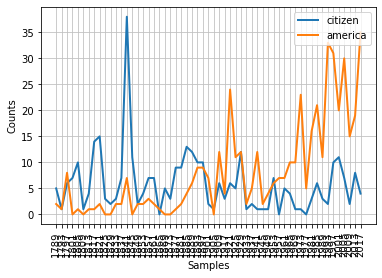

In [11]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()

## 1.6 Annotated Text Corpora

## 1.7 Corpora in Other Languages

In [12]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [13]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [14]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [15]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [16]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

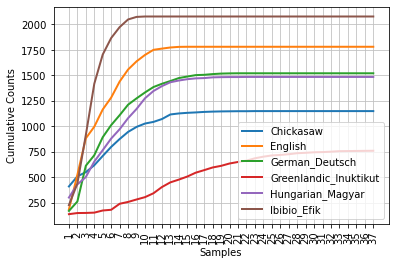

In [17]:
# conditional frequency distribution of word lenghts for different languages
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word))
                               for lang in languages
                               for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

## 1.8 Text Corpus Structure
See in the book https://www.nltk.org/book/ch02.html

In [18]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

'The Adventures of B'

In [19]:
words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]


['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [20]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.'],
 ['Then',
  'he',
  'walked',
  'over',
  'to',
  'a',
  'big',
  'pine',
  '-',
  'tree',
  ',',
  'stood',
  'up',
  'on',
  'his',
  'hind',
  'legs',
  ',',
  'reached',
  'as',
  'high',
  'up',
  'on',
  'the',
  'trunk',
  'of',
  'the',
  'tree',
  'as',
  'he',
  'could',
  ',',
  'and',
  'scratched',
  'the',
  'bark',
  'with',
  'his',
  'great',
  'claws',
  '.'],
 ['After',
  'that',
  'he',
  'yawned',
  'until',
  'it',
  'seemed',
  'as',
  'if',
  'his',

## 1.9 Loading your own Corpus

In [21]:
# Here's a way to load your own corpora to be analysed by nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'C:\\Users\\seidi\\Documents\\GitHub\\nltk-book-jupyter'
wordlists = PlaintextCorpusReader(corpus_root, '.*txt')
wordlists.fileids()

['filminhos.txt']

In [22]:
wordlists.words()

['-', '(', '2016', ')', 'Silence', '-', 'Martin', ...]

Other corpus access example on Section 1.9

# 2. Conditional Frequency Distributions

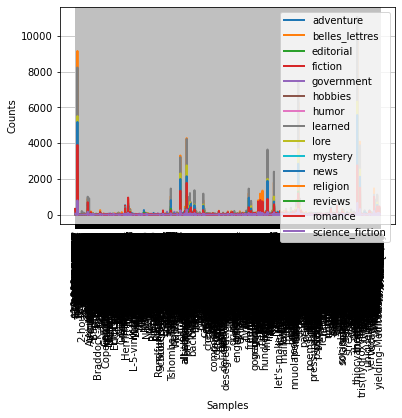

In [23]:
# pairing each word in the corpus with a category (genre)
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
cfd.plot()

In [24]:
# example with just genres news and romance
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]
len(genre_word)

170576

In [25]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [26]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [27]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

['news', 'romance']

In [28]:
print(cfd['news'])
print(cfd['romance'])
cfd['romance'].most_common(20)
cfd['romance']['could']

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>


193

## 2.3 Plotting and Tabulating Distributions

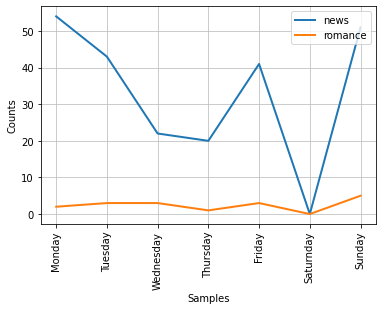

In [29]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturnday', 'Sunday']
genres = ['news', 'romance']
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in brown.words(categories = genre)
)
cfd.plot(conditions = genres, samples = days)


In [30]:
cfd.tabulate(samples = days)

           Monday   Tuesday Wednesday  Thursday    Friday Saturnday    Sunday 
   news        54        43        22        20        41         0        51 
romance         2         3         3         1         3         0         5 


## 2.4 Generating Random Text Bigrams

In [31]:
# creating bigrams with bigrams() function
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [32]:
# generating words given a bigram distribution
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [33]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [34]:

generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

See Table 2.1 for NLTK's Conditional Frequency Distributions commonly-used methods and idioms

# 3 More Python: Reusing Code

## 3.1 Creating Programs with a Text Editor
This section gives an example of how to create and run a script form python's IDLE

## 3.2 Functions
This section explains function definition and local variables scope

In [35]:
# function with simple rules to produe english plural
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'
plural('fairy')
plural('woman')

'women'

## 3.3 Modules
A way to aggregate functions and make then easily referenciable

# 4 Lexical Resources
A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions.

## 4.1 Wordlist Corpora

In [36]:
# function to find unusual words in a text (list of words)
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [37]:
# list of stopwords
from nltk.corpus import stopwords
stopwords.words('portuguese')

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [38]:
# Finding words that contains only the letters 'egivrvonl', with at least 4 letters and every word must contain 'r'
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 4
 and obligatory in w 
 and nltk.FreqDist(w) <= puzzle_letters]

['enrol',
 'ergon',
 'genro',
 'girl',
 'girn',
 'giro',
 'giver',
 'glor',
 'glore',
 'glover',
 'goer',
 'goner',
 'gore',
 'gorlin',
 'govern',
 'grein',
 'grin',
 'groin',
 'grove',
 'grovel',
 'ignore',
 'inro',
 'involver',
 'iron',
 'irone',
 'levir',
 'lienor',
 'lier',
 'liner',
 'linger',
 'lire',
 'liver',
 'livor',
 'livre',
 'loir',
 'longer',
 'lore',
 'lori',
 'lorn',
 'lover',
 'lovering',
 'negro',
 'nigre',
 'noiler',
 'noir',
 'nori',
 'norie',
 'ogler',
 'ogre',
 'oiler',
 'oner',
 'oriel',
 'orle',
 'over',
 'overling',
 'regin',
 'region',
 'reign',
 'rein',
 'renvoi',
 'reoil',
 'revolving',
 'rigol',
 'rile',
 'rine',
 'ring',
 'ringe',
 'ringle',
 'rive',
 'rivel',
 'riven',
 'roil',
 'role',
 'rone',
 'rove',
 'roving',
 'vergi',
 'veri',
 'vier',
 'vigor',
 'viner',
 'violer',
 'vire',
 'vireo',
 'virl',
 'virole',
 'viron',
 'viver',
 'girl',
 'iron',
 'over',
 'ring']

In [39]:
# Finding names that are used as both masculine and feminine
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

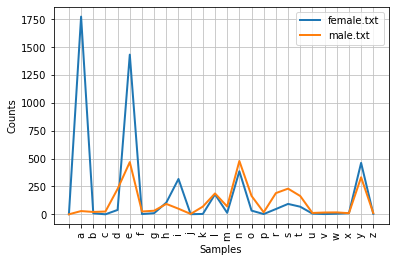

In [40]:
# now, finding if there is a pattern of name belonging to either masculine or feminine category an its ending letter
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

## 4.2 A Pronouncing Dictionary

In [41]:
# pronouncing dictionary for speech sinthesizer
entries = nltk.corpus.cmudict.entries()
len(entries)
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


In [42]:
# rhyming words examples (ending in 'nicks')
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

In [43]:
word = 'abcdefg'

In [44]:
word[-1]

'g'

In [45]:
# minimally cotrasting sets of words
entries = nltk.corpus.cmudict.entries()
p3 = [(pron[0]+'-'+pron[2], word)
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3]
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [46]:
cfd.conditions()

['P-P',
 'P-R',
 'P-SH',
 'P-K',
 'P-S',
 'P-D',
 'P-TH',
 'P-F',
 'P-JH',
 'P-L',
 'P-IY0',
 'P-N',
 'P-Z',
 'P-T',
 'P-M',
 'P-NG',
 'P-CH',
 'P-V',
 'P-ER0',
 'P-ER1',
 'P-G',
 'P-AH0',
 'P-OW0',
 'P-OW1',
 'P-UW1',
 'P-AA1',
 'P-EY1',
 'P-IY1',
 'P-AW1',
 'P-OY1',
 'P-AY1',
 'P-B']

In [47]:
# loading the pronunciation dictionary in the form of a python dictionary structure
prondict = nltk.corpus.cmudict.dict()
prondict['fire']


[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [48]:
# using the above to produce a sort of pronunciation given a text
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

## 4.3 Comparative Wordlists

In [49]:
# 200 common words in several languages
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [50]:
swadesh.words('ru')

['я',
 'ты',
 'он',
 'мы',
 'вы',
 'они',
 'это',
 'то',
 'тут',
 'там',
 'кто',
 'что',
 'где',
 'когда',
 'как',
 'не',
 'все',
 'много',
 'несколько',
 'немного',
 'иной',
 'один',
 'два',
 'три',
 'четыре',
 'пять',
 'великий',
 'долгий',
 'широкий',
 'толстый',
 'тяжёлый',
 'маленький',
 'короткий',
 'узкий',
 'тонкий',
 'женщина',
 'мужчина',
 'человек',
 'дитя',
 'супруга',
 'супруг',
 'мать',
 'отец',
 'животное',
 'рыба',
 'птица',
 'пёс',
 'вошь',
 'змея',
 'червь',
 'дерево',
 'лес',
 'палка',
 'фрукт',
 'семена',
 'лист',
 'корень',
 'кора',
 'цветок',
 'трава',
 'верёвка',
 'шкура',
 'мясо',
 'кровь',
 'кость',
 'жир',
 'яйцо',
 'рог',
 'хвост',
 'перо',
 'волосы',
 'голова',
 'ухо',
 'глаз',
 'нос',
 'рот',
 'зуб',
 'язык',
 'ноготь',
 'стопа',
 'нога',
 'колено',
 'ладонь',
 'крыло',
 'живот',
 'кишки',
 'шея',
 'спина',
 'грудь',
 'сердце',
 'печень',
 'пить',
 'кушать',
 'кусать',
 'сосать',
 'плевать',
 'блевать',
 'дуть',
 'дышать',
 'смеяться',
 'видеть',
 'слышать'

In [51]:
en2ru = swadesh.entries(['en', 'ru'])
print(en2ru)

[('I', 'я'), ('you (singular), thou', 'ты'), ('he', 'он'), ('we', 'мы'), ('you (plural)', 'вы'), ('they', 'они'), ('this', 'это'), ('that', 'то'), ('here', 'тут'), ('there', 'там'), ('who', 'кто'), ('what', 'что'), ('where', 'где'), ('when', 'когда'), ('how', 'как'), ('not', 'не'), ('all', 'все'), ('many', 'много'), ('some', 'несколько'), ('few', 'немного'), ('other', 'иной'), ('one', 'один'), ('two', 'два'), ('three', 'три'), ('four', 'четыре'), ('five', 'пять'), ('big', 'великий'), ('long', 'долгий'), ('wide', 'широкий'), ('thick', 'толстый'), ('heavy', 'тяжёлый'), ('small', 'маленький'), ('short', 'короткий'), ('narrow', 'узкий'), ('thin', 'тонкий'), ('woman', 'женщина'), ('man (adult male)', 'мужчина'), ('man (human being)', 'человек'), ('child', 'дитя'), ('wife', 'супруга'), ('husband', 'супруг'), ('mother', 'мать'), ('father', 'отец'), ('animal', 'животное'), ('fish', 'рыба'), ('bird', 'птица'), ('dog', 'пёс'), ('louse', 'вошь'), ('snake', 'змея'), ('worm', 'червь'), ('tree', 'де

In [52]:
# Create dictionary of translation
translate = dict(en2ru)
print(translate['name'])

fr2ru = swadesh.entries(['fr', 'ru'])
translate.update(dict(fr2ru))

print(translate['je'])
print(translate['I'])

имя
я
я


In [53]:
swadesh.readme()

'Swadesh Wordlists\n\nDerived from\nhttp://en.wiktionary.org/wiki/Appendix:Swadesh_list\n(incomplete)\n'

## 4,4 Shoebox and Toolbox Lexicons

In [54]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

#ps = part of speech
#ge = gloss into english


[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 


# 5. WordNet

## 5.1 Senses and Synonyms

In [55]:
from nltk.corpus import wordnet as wn

In [56]:
# synonyms (or lemmas) set of (motor)car
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [57]:
# prose definition and sentence example
wn.synset('car.n.01').definition()
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [58]:
# select a lemma, see to which synset it belongs ant get its name
wn.synset('car.n.01').lemmas()
wn.lemma('car.n.01.automobile') 
wn.lemma('car.n.01.automobile').synset()
wn.lemma('car.n.01.automobile').name()

'automobile'

In [59]:
# word car is ambiguous, as it may belong to many synsets
wn.synsets('car')
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [60]:
# to access all lemmas of a word, use e.g. the following
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

## 5.2 The WordNet Hierarchy
Synsets are relate in an hypernym/hyponym structure (superordinate and subordinate concepts). See Fig. 5.1 in the book

In [65]:
# Looking at hyponyms of 'car'
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0] # Synset('ambulance.n.01')
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [68]:
# Looking at hypernyms of 'motorcar'
motorcar = wn.synset('car.n.01')
groups_of_motorcar = motorcar.hypernyms()
sorted(lemma.name() for synset in groups_of_motorcar for lemma in synset.lemmas())

['automotive_vehicle', 'motor_vehicle']

In [70]:
# paths from motorcar to  entity.n.01
motorcar.hypernyms()
paths = motorcar.hypernym_paths()
print(len(paths))
for synset in paths[0]:
    print(synset)
    
print()


for synset in paths[1]:
    print(synset)

2
Synset('entity.n.01')
Synset('physical_entity.n.01')
Synset('object.n.01')
Synset('whole.n.02')
Synset('artifact.n.01')
Synset('instrumentality.n.03')
Synset('container.n.01')
Synset('wheeled_vehicle.n.01')
Synset('self-propelled_vehicle.n.01')
Synset('motor_vehicle.n.01')
Synset('car.n.01')

Synset('entity.n.01')
Synset('physical_entity.n.01')
Synset('object.n.01')
Synset('whole.n.02')
Synset('artifact.n.01')
Synset('instrumentality.n.03')
Synset('conveyance.n.03')
Synset('vehicle.n.01')
Synset('wheeled_vehicle.n.01')
Synset('self-propelled_vehicle.n.01')
Synset('motor_vehicle.n.01')
Synset('car.n.01')


In [71]:
# getting the root hypernym
motorcar.root_hypernyms()

[Synset('entity.n.01')]

In [73]:
# try nltk.app.wordnet() for graphical wordnet browser

## 5.3 More Lexical Relations

In [75]:
# WordNet navigation in meronyms (items to their components)
print(wn.synset('tree.n.01').part_meronyms())
print(wn.synset('tree.n.01').substance_meronyms())

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
[Synset('heartwood.n.01'), Synset('sapwood.n.01')]


In [77]:
# WordNet navigation in holonyms (things the word is contained in)
print(wn.synset('tree.n.01').member_holonyms())

[Synset('forest.n.01')]


In [79]:
# The complexity of navigation as exemplified by the word 'mint'
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())
    
print(wn.synset('mint.n.04').part_holonyms())

print(wn.synset('mint.n.04').substance_holonyms())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government
[Synset('mint.n.02')]
[Synset('mint.n.05')]


In [82]:
# Verbs entailment
print(wn.synset('walk.v.01').entailments())

print(wn.synset('eat.v.01').entailments())

print(wn.synset('tease.v.03').entailments())

[Synset('step.v.01')]
[Synset('chew.v.01'), Synset('swallow.v.01')]
[Synset('arouse.v.07'), Synset('disappoint.v.01')]


In [84]:
# Lexical relationship between lemmas: antonym
print(wn.lemma('supply.n.02.supply').antonyms())

print(wn.lemma('rush.v.01.rush').antonyms())

print(wn.lemma('horizontal.a.01.horizontal').antonyms())

print(wn.lemma('staccato.r.01.staccato').antonyms())

[Lemma('demand.n.02.demand')]
[Lemma('linger.v.04.linger')]
[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]
[Lemma('legato.r.01.legato')]


In [86]:
 # lexical relations and methods defined on a synset, e.g. harmony.n.02
dir(wn.synset('harmony.n.02'))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'in_region_domains',
 'in_topic_domains',
 'in_usage_domains',
 '

## 5.4 Semantic Similarity

In [88]:
# Two synsets that share the same hypernym must be closely related
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

print(right.lowest_common_hypernyms(minke))
print(right.lowest_common_hypernyms(orca))
print(right.lowest_common_hypernyms(tortoise))
print(right.lowest_common_hypernyms(novel))

[Synset('baleen_whale.n.01')]
[Synset('whale.n.02')]
[Synset('vertebrate.n.01')]
[Synset('entity.n.01')]


In [89]:
# Looking at the depth of each synset
print(wn.synset('baleen_whale.n.01').min_depth())
print(wn.synset('whale.n.02').min_depth())
print(wn.synset('vertebrate.n.01').min_depth())
print(wn.synset('entity.n.01').min_depth())

14
13
8
0


In [90]:
# path of simlarity will take into account the insight above and find how two synsets are related
# the metric has a range of 0 to 1 (most similar), while -1 is returned if no path is found

print(right.path_similarity(minke))
print(right.path_similarity(orca))
print(right.path_similarity(tortoise))
print(right.path_similarity(novel))

0.25
0.16666666666666666
0.07692307692307693
0.043478260869565216



# Summary
- A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, nltk.corpus.brown.
- Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.
- A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.
- Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py extension, and accessed using an import statement.
- Python functions permit you to associate a name with a particular block of code, and re-use that code as often as necessary.
- Some functions, known as "methods", are associated with an object and we give the object name followed by a period followed by the function, like this: x.funct(y), e.g., word.isalpha().
- To find out about some variable v, type help(v) in the Python interactive interpreter to read the help entry for this kind of object.
- WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.
- Some functions are not available by default, but must be accessed using Python's import statement.